Data Augmentation on Fashion MNIST

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models;
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

train_images, test_images = train_images/255.0, test_images/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

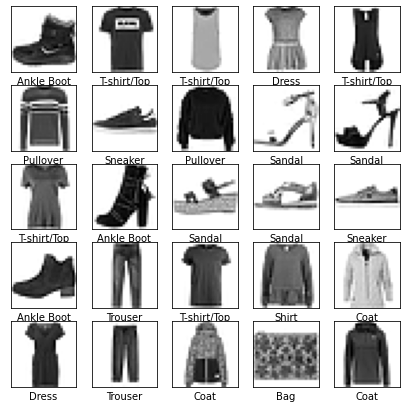

In [4]:
#verifying the data
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

plt.figure(figsize=(7,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
def augment_data(dataset, dataset_labels, augementation_factor=1, use_random_rotation=True, use_random_shear=True, use_random_shift=True, use_random_zoom=True):
	augmented_image = []
	augmented_image_labels = []

	for num in range (0, dataset.shape[0]):

		for i in range(0, augementation_factor):
			# original image:
			augmented_image.append(dataset[num])
			augmented_image_labels.append(dataset_labels[num])

			if use_random_rotation:
				augmented_image.append(tf.keras.preprocessing.image.random_rotation(dataset[num], 20, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_shear:
				augmented_image.append(tf.keras.preprocessing.image.random_shear(dataset[num], 0.2, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_shift:
				augmented_image.append(tf.keras.preprocessing.image.random_shift(dataset[num], 0.2, 0.2, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_zoom:
				augmented_image.append(tf.keras.preprocessing.image.random_zoom(dataset[num], (0.9, 0.9), row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

	return np.array(augmented_image), np.array(augmented_image_labels)

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1);

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1);

In [7]:
augmented_images, augmented_labels = augment_data(train_images, train_labels)

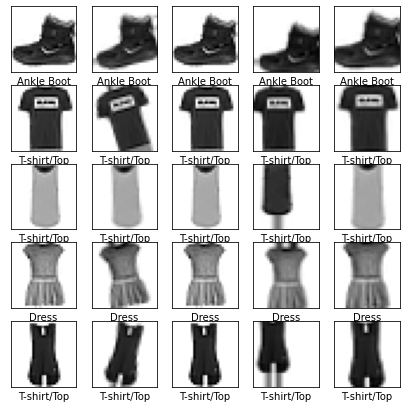

In [8]:
show_images = augmented_images.reshape(augmented_images.shape[0], 28, 28);
#verifying the data
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

plt.figure(figsize=(7,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(show_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[augmented_labels[i]])
plt.show()

In [9]:
train_images.shape

(60000, 28, 28, 1)

In [10]:
augmented_images.shape

(300000, 28, 28, 1)

In [11]:
#creating the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
#model.add(layers.Dense(3136, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(augmented_images, augmented_labels, batch_size=128, epochs=10, verbose=1, validation_data=(train_images, train_labels))

Epoch 1/10
2344/2344 [==============================] - 291s 124ms/step - loss: 0.4377 - accuracy: 0.8371 - val_loss: 0.2445 - val_accuracy: 0.9107
Epoch 2/10
2344/2344 [==============================] - 287s 122ms/step - loss: 0.2996 - accuracy: 0.8879 - val_loss: 0.2023 - val_accuracy: 0.9241
Epoch 3/10
2344/2344 [==============================] - 289s 123ms/step - loss: 0.2469 - accuracy: 0.9075 - val_loss: 0.1651 - val_accuracy: 0.9372
Epoch 4/10
2344/2344 [==============================] - 286s 122ms/step - loss: 0.2113 - accuracy: 0.9201 - val_loss: 0.1317 - val_accuracy: 0.9498
Epoch 5/10
2344/2344 [==============================] - 287s 123ms/step - loss: 0.1831 - accuracy: 0.9312 - val_loss: 0.0961 - val_accuracy: 0.9646
Epoch 6/10
2344/2344 [==============================] - 285s 122ms/step - loss: 0.1602 - accuracy: 0.9398 - val_loss: 0.0834 - val_accuracy: 0.9686
Epoch 7/10
2344/2344 [==============================] - 287s 122ms/step - loss: 0.1421 - accuracy: 0.9464 - val_